# Regularization

Welcome to the second assignment of this week. Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough. Sure it does well on the training set, but the learned network **doesn't generalize to new examples** thtat it has never seen!

**You will learn to:** Use regularization in your deep learning models.

Let's first import the packages you are going to use.

In [2]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Problem Statement**: You have just been hired as an AI expert by the French Football Corportation. They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head.

<img src="images/field_kiank.png" style="width:600px;height:350px;">
<caption><center> <u> Figure 1 </u>: Football field<br> The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head </center><caption>

They give you the following 2D dataset from France's past 10 games.

In [3]:
import os

cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'E:\\A\\Github\\Deep-Learning-Specialization-AndrewNg\\Course 2 Improving Deep Neural Networks\\Week 1 Practical aspects of Deep Learning': ['.ipynb_checkpoints', 'Programming Assignment', 'Programming Assignment 2_Regularization.ipynb', 'init_utils.py', 'Programming Assignment 1_Initialization.ipynb', 'images', 'reg_utils.py', 'testCases.py', 'datasets', '__pycache__']


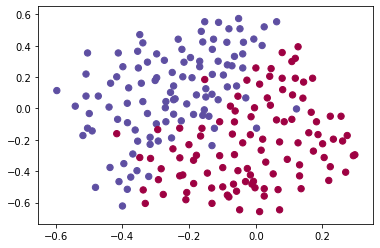

In [4]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

# Possible errors
# (1) "ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 211, 'y' with size 211." 
# Soluiton: update c=train_Y to c=np.squeeze(train_Y) in the "def load_2D_dataset():" section of reg_utils.py file then restart kernel.
# (2) FileNotFoundError: [Errno 2] No such file or directory: 'datasets/data.mat'
# Solution:

Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keepr has shot the ball from the left side of the football field.

- If the dot is blue, it means the French player managed to hit the ball with his/her head
- If the dot is red, it means the other teams' player hit the ball with their head

**Your goal**: Use a deep learning models to find the positions on the field where the goalkeeper should kick the ball.

**Analysis of the dataset**: This dataset is a little noisy, but it looks like a diagnal line seperating the upper left half(blue) from the lower right half(red) would work well.

You will first try a non-regularized model. Then you'll learn how to regularize it the decide which model you will choose to solve the French Football Corporations' problem.

## 1 - Non-regularized model

You will use the following neural network (already implemented for you below). This model can be used:

- in regularization mode -- by setting the lambd input to a non-zero value. We use "lambd" instead of "lambda" because "lambda" is a reserved keyword in Python.
- in dropout mode -- by setting the keep_prob to a value less than one

You will first try the model without regularization. Then, you will implement:

- L2 regularization -- functions: "compute_cost_with_regularization()" and
"backward_propagation_with regularization()"
- Dropout -- functions: "forward_propagation_with_dropout()" and 
"backward_propagation_with_dropout()"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [5]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implement a three-layer neural network: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of the iterations of the optimization loop
    print_cost -- If true, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob -- probability of keeping a neuron active during drop-out, scaler.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
    
    grads = {}
    costs = []      # to keep track of cost
    m = X.shape[1]  # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    
    for i in range(0, num_iterations):
        
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
        
        # Backward propagation
        assert(lambd == 0 or keep_prob == 1)  # it is possbile to use both L2 regularization and dropout,
                                              # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}:{}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Let's train the model without any regularization and observe the accuracy on the train/test sets.

Cost after iteration 0:0.6557412523481002
Cost after iteration 10000:0.1632998752572419
Cost after iteration 20000:0.13851642423239133


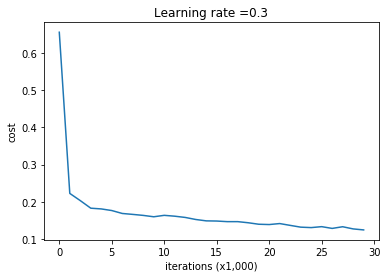

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [6]:
parameters = model(train_X, train_Y)
print ("On the training set:")
prediction_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
prediction_test = predict(test_X, test_Y, parameters)

The train accuracy is 94.8% while the test accuracy is 91.5%. This is the **baseline model** (you will observe the impact of regularization on this model). Run the following code to plot the decision boundary of your model.

ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 211, 'y' with size 211.

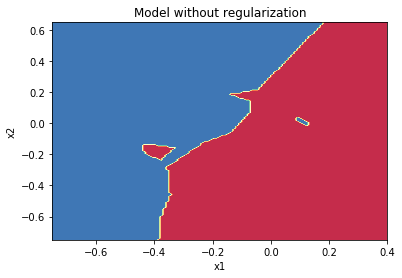

In [7]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# You may meet "ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 211, 'y' with size 211."
# 

The non-regularized model is obviousely overfitting the training set. It is fitting the noisy points! Let's now look at two techniques to reduce overfitting.

## 2 - L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of approriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1 - y^{(i)})\log\left(1 - a^{[L](i)}\right) \large{)} \tag{1}$$

To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i=1}^{m} \large{(}\small y^{(i)} \log\left(a^{[L](i)}\right) + (1 - y^{(i)} \log\left(1 - a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_{l} \sum\limits_{k} \sum\limits_{j}W_kj^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

**Exercise**: Implement compute_cost_with_regularization() which computes the cost given by formula (2). To calculate $\sum\limits_{k} \sum\limits_{j} W_{kj}^{[l]2}$, use:

    np.sum(np.square(wl))

Note that you have to do this for $W^{[1]},W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $\frac{l}{m} \frac{\lambda}{2}$.

In [ ]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward